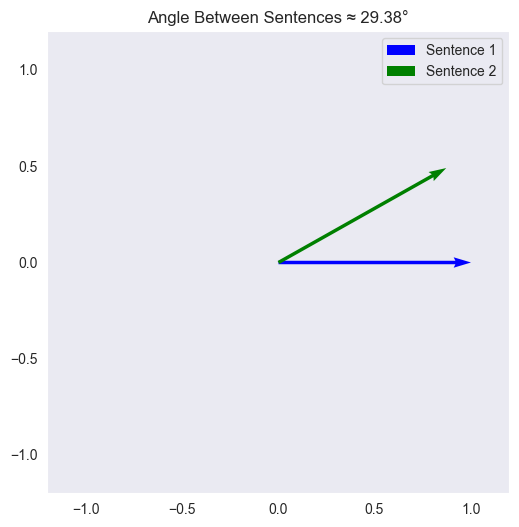

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Upload model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# Sentences
sentence1 = "Artificial intelligence is transforming the world."
sentence2 = "AI is changing the world."

# Vectors
vec1 = model.encode(sentence1)
vec2 = model.encode(sentence2)

# Normalizing
vec1 = vec1 / np.linalg.norm(vec1)
vec2 = vec2 / np.linalg.norm(vec2)

# create 2D coordinate  (to keep direction)
angle1 = 0
angle2 = np.arccos(np.clip(np.dot(vec1, vec2), -1.0, 1.0))

# Draw vectors based on angle
vec1_2d = [np.cos(angle1), np.sin(angle1)]
vec2_2d = [np.cos(angle2), np.sin(angle2)]

# Visual
plt.figure(figsize=(6,6))
plt.quiver(0, 0, vec1_2d[0], vec1_2d[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Sentence 1')
plt.quiver(0, 0, vec2_2d[0], vec2_2d[1], angles='xy', scale_units='xy', scale=1, color='green', label='Sentence 2')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend()
plt.title(f"Angle Between Sentences ≈ {np.degrees(angle2):.2f}°")
plt.show()
